In [1]:
import numpy as np
from fractions import Fraction
directory = 'lorenz/'


dyn_lorenz = {"sigma":10.0, "R":28.0, "b": 8/3}
# x0 = np.arscatter3Dray([10.0, 1.0, 0.0])
# x0 = np.array([-8.485, -8.485, 27])
x0 = np.array([10.0, 1.0, 0.0])
alpha = 20

x_velocity = []
def lorenz (x0, dyn, action):
    sigma = dyn['sigma']
    R = dyn['R']
    b = dyn['b']
    x = x0[0]
    y = x0[1]
    z = x0[2]
    return np.array([sigma * (y - x) + alpha*action, x * (R - z) - y + alpha*action, x * y - b * z + alpha*action])


def RungeKutta (dyn, f, dt, x0, action):
    k1 = f(x0, dyn, action/4)*dt #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn, action/4)*dt
    k3 = f(x0 + 0.5*k2*dt, dyn, action/4)*dt
    k4 = f(x0 + k3*dt, dyn, action/4)*dt
    x = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    return x

def f_t (dyn, f, dt, x0, T, action):
    x = np.empty(shape=(len(x0),T))
    x[:, 0] = x0     
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1], action) 
    return x




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = f_t(dyn_lorenz, lorenz, 0.01, x0, 5000, 0)


In [3]:
x[2].mean()

24.97857442449377

In [13]:
x[0].mean()

0.6345211003961665

/tmp/ipykernel_5051/1881605529.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


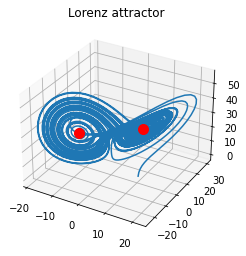

In [5]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x[0], x[1], x[2])
ax.scatter(-8.485, -8.485, 27, s=100, color="red")
ax.scatter(8.485, 8.485, 27, s=100, color="red")
plt.title('Lorenz attractor')
plt.draw()
#plt.savefig(directory + 'Lorenz_attractor.png')

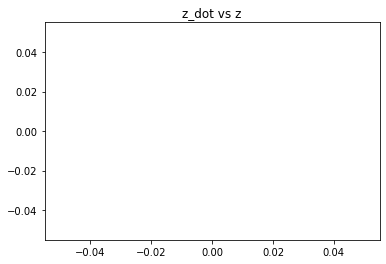

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('z_dot vs z')
ax.plot(np.array(list(range(len(x_velocity)))), x_velocity)

In [41]:
for i in x:
    print ('min:', min(i), 'max:', max(i))

min: -17.664894405422988 max: 21.413117786737917
min: -23.265345719449616 max: 28.78112448397349
min: 0.0 max: 54.00713007712817


In [37]:
for i in x:
    print ('min:', min(i), 'max:', max(i))

min: -22.815454626392917 max: 19.04811404788441
min: -31.304467283773302 max: 25.531906244280563
min: -0.5404959192758815 max: 56.717614665587575
